# Using Pre-trained Model (VGG)

* 딥러닝 세미나 : 실습 [1]
* 김무성

이 자료는 
* [1] https://github.com/sjchoi86/Tensorflow-101 의 5. Using Pre-trained Model (VGG): Simple Usage / CNN Fine-tuning on Custom Dataset 를 바탕으로 만들어짐.

# Contents


* 1. VGG ?
* 2. Simple Usage

# 1. VGG ?

#### 참고
* [3] Very Deep Convolutional Networks for Large-Scale Image Recognition (orignial paper) - http://arxiv.org/abs/1409.1556
* [4] ILSVRC-2014 presentation - http://www.robots.ox.ac.uk/~karen/pdf/ILSVRC_2014.pdf
* [5] Very Deep Convolutional Networks for Large-Scale Image Recognition (slide) - http://llcao.net/cu-deeplearning15/presentation/cc3580_Simonyan.pptx
* [6] VGG 프로젝트 페이지 - http://www.robots.ox.ac.uk/~vgg/research/very_deep/

vgg 19 model - http://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.svg 

# 2. Simple Usage

#### 참고
* [1]의 Simple Usage - https://github.com/sjchoi86/tensorflow-101/blob/master/notebooks/use_vgg.ipynb
* [7] MatConvNet: CNNs for MATLAB - http://www.vlfeat.org/matconvnet/
* [8] VGG pretrained model - http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat
* [9] 19-layer model: information page in the Caffe Zoo - https://gist.github.com/ksimonyan/3785162f95cd2d5fee77#file-readme-md
* [10] VGG19 model for Keras - https://gist.github.com/baraldilorenzo/8d096f48a1be4a2d660d

### 패키지 임포트

In [1]:
import scipy.io
import numpy as np 
import os 
import scipy.misc 
import matplotlib.pyplot as plt 
import tensorflow as tf
%matplotlib inline  

### pretrained model & data 준비

* [8] VGG pretrained model - http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat

In [2]:
!ls

Using_Pre-trained_Model_VGG.ipynb  data  images


In [3]:
!ls data

imagenet-vgg-verydeep-19.mat


In [4]:
!ls images

cat.jpg


In [5]:
D_DATA_PATH = 'data/imagenet-vgg-verydeep-19.mat'

In [6]:
D_IMG_PATH = 'images/cat.jpg'

### 모델 로딩 & 살펴보기

매틀랩 포맷은 scipy의 함수로 로딩해서 ndarray로 바꿀수 있다. 

In [7]:
data = scipy.io.loadmat(D_DATA_PATH)

In [8]:
type(data)

dict

In [9]:
data.keys()

['layers',
 '__header__',
 '__globals__',
 'classes',
 '__version__',
 'normalization']

### normalize 된 데이터 값 가져오기

In [10]:
type(data['normalization'])

numpy.ndarray

In [11]:
data['normalization'].ndim

2

In [12]:
len(data['normalization'][0][0][0])

224

In [13]:
mean = data['normalization'][0][0][0]

In [14]:
mean.ndim

3

In [15]:
mean

array([[[ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        ..., 
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939]],

       [[ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        ..., 
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939]],

       [[ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        ..., 
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939]],

       ..., 
       [[ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
        ..., 
        [ 123.68 ,  116.779,  103.939],
        [ 123.68 ,  116.779,  103.939],
     

### weights 가져오기

In [16]:
weights = data['layers'][0]

In [17]:
len(weights)

43

In [18]:
weights[0]

array([[ ([[array([[[[ 0.39416704, -0.08419707, -0.03631314, ..., -0.10720515,
          -0.03804016,  0.04690642],
         [ 0.46418372,  0.03355668,  0.10245045, ..., -0.06945956,
          -0.04020201,  0.04048637],
         [ 0.34119523,  0.09563112,  0.0177449 , ..., -0.11436455,
          -0.05099866, -0.00299793]],

        [[ 0.37740308, -0.07876257, -0.04775979, ..., -0.11827433,
          -0.19008617, -0.01889699],
         [ 0.41810837,  0.05260524,  0.09755926, ..., -0.09385028,
          -0.20492788, -0.0573062 ],
         [ 0.33999205,  0.13363543,  0.02129423, ..., -0.13025227,
          -0.16508926, -0.06969624]],

        [[-0.04594866, -0.11583115, -0.14462094, ..., -0.12290562,
          -0.35782176, -0.27979308],
         [-0.04806903, -0.00658076, -0.02234544, ..., -0.0878844 ,
          -0.3915486 , -0.34632796],
         [-0.04484424,  0.06471398, -0.07631404, ..., -0.12629718,
          -0.29905206, -0.28253639]]],


       [[[ 0.2671299 , -0.07969447,  0.05988

### 텐서플로우로 네트워크 만들기 함수

In [19]:
def net(data_path, input_image):
    layers = (
        'conv1_1', 'relu1_1', 'conv1_2', 'relu1_2', 'pool1',

        'conv2_1', 'relu2_1', 'conv2_2', 'relu2_2', 'pool2',

        'conv3_1', 'relu3_1', 'conv3_2', 'relu3_2', 'conv3_3',
        'relu3_3', 'conv3_4', 'relu3_4', 'pool3',

        'conv4_1', 'relu4_1', 'conv4_2', 'relu4_2', 'conv4_3',
        'relu4_3', 'conv4_4', 'relu4_4', 'pool4',

        'conv5_1', 'relu5_1', 'conv5_2', 'relu5_2', 'conv5_3',
        'relu5_3', 'conv5_4', 'relu5_4'
    )

    data = scipy.io.loadmat(data_path)
    mean = data['normalization'][0][0][0]
    mean_pixel = np.mean(mean, axis=(0, 1))
    weights = data['layers'][0]

    net = {}
    current = input_image
    for i, name in enumerate(layers):
        kind = name[:4]
        if kind == 'conv':
            kernels, bias = weights[i][0][0][0][0]
            # matconvnet: weights are [width, height, in_channels, out_channels]
            # tensorflow: weights are [height, width, in_channels, out_channels]
            kernels = np.transpose(kernels, (1, 0, 2, 3))
            bias = bias.reshape(-1)
            current = _conv_layer(current, kernels, bias)
        elif kind == 'relu':
            current = tf.nn.relu(current)
        elif kind == 'pool':
            current = _pool_layer(current)
        net[name] = current

    assert len(net) == len(layers)
    return net, mean_pixel

def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1, 1, 1, 1),
            padding='SAME')
    return tf.nn.bias_add(conv, bias)
def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1),
            padding='SAME')
def preprocess(image, mean_pixel):
    return image - mean_pixel
def unprocess(image, mean_pixel):
    return image + mean_pixel

### 이미지 읽기/저장 함수

In [20]:
def imread(path):
    return scipy.misc.imread(path).astype(np.float)

def imsave(path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)

### 모델 로딩 & 실행

In [21]:
VGG_PATH = D_DATA_PATH
IMG_PATH = D_IMG_PATH

input_image = imread(IMG_PATH)
shape = (1,) + input_image.shape # (h, w, nch) =>  (1, h, w, nch)

[1/3] relu2_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 513, 684, 128)
[2/3] relu3_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 257, 342, 256)
[3/3] relu4_1
 Type of 'features' is  <type 'numpy.ndarray'>
 Shape of 'features' is (1, 129, 171, 512)

___.


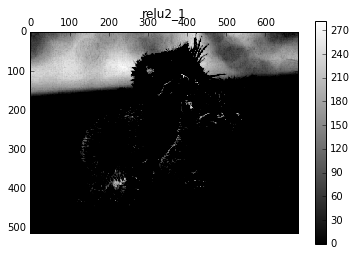

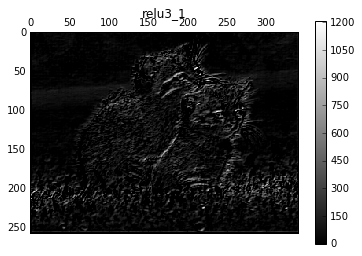

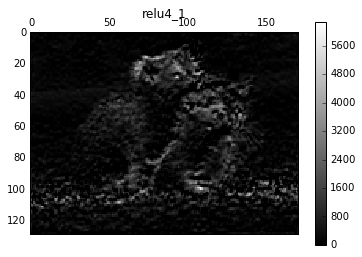

In [22]:
with tf.Graph().as_default(), tf.Session() as sess:
    image = tf.placeholder('float', shape=shape)
    net, mean_pixel = net(VGG_PATH, image)
    input_image_pre = np.array([preprocess(input_image, mean_pixel)])
    # layers = all_layers # For all layers 
    layers = ('relu2_1', 'relu3_1', 'relu4_1')
    for i, layer in enumerate(layers):
        print "[%d/%d] %s" % (i+1, len(layers), layer)
        features = net[layer].eval(feed_dict={image: input_image_pre})
        print " Type of 'features' is ", type(features)
        print " Shape of 'features' is %s" % (features.shape,)
        # Plot response 
        if 1:
            plt.figure(i+1)
            plt.matshow(features[0, :, :, 0], cmap=plt.cm.gray, fignum=i+1)
            plt.title("" + layer)
            plt.colorbar()
print "\n___."
plt.show()

# 참고자료
* [1] https://github.com/sjchoi86/Tensorflow-101
* [2] 딥러닝 단어사전 - 대회 우승 비전 모형 - http://wizardsnote.tumblr.com/post/139014844386/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%8B%A8%EC%96%B4%EC%82%AC%EC%A0%84-%EB%8C%80%ED%9A%8C-%EC%9A%B0%EC%8A%B9-%EB%B9%84%EC%A0%84-%EB%AA%A8%ED%98%95
* [3] Very Deep Convolutional Networks for Large-Scale Image Recognition (orignial paper) - http://arxiv.org/abs/1409.1556
* [4] ILSVRC-2014 presentation - http://www.robots.ox.ac.uk/~karen/pdf/ILSVRC_2014.pdf
* [5] Very Deep Convolutional Networks for Large-Scale Image Recognition (slide) - http://llcao.net/cu-deeplearning15/presentation/cc3580_Simonyan.pptx 
* [6] VGG 프로젝트 페이지 - http://www.robots.ox.ac.uk/~vgg/research/very_deep/
* [7] MatConvNet: CNNs for MATLAB - http://www.vlfeat.org/matconvnet/
* [8] VGG pretrained model - http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat
* [9] 19-layer model: information page in the Caffe Zoo - https://gist.github.com/ksimonyan/3785162f95cd2d5fee77#file-readme-md
* [10] VGG19 model for Keras - https://gist.github.com/baraldilorenzo/8d096f48a1be4a2d660d